**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

### Dowód, że to jest zmienna losowa
$$ \sum_{k \in \text{całkowite}} P(X = k) = \frac{1}{2} + 2 \sum_{k\ge 1} P(X = k) =  \frac{1}{2} +  \frac{1}{2} \cdot \sum_{k \ge 1} \frac{1}{k(k + 1)} =  \frac{1}{2} +  \frac{1}{2} \cdot \sum_{k \ge 1} \frac{1}{k} - \frac{1}{k + 1}$$
Ostatnia suma zwija się teleskopowo i zostaje pierwszy element, $1/1 = 1$, zatem:
$$\frac{1}{2} +  \frac{1}{2} \cdot \sum_{k \ge 1} \frac{1}{k} - \frac{1}{k + 1} = 1$$
Stąd jest to poprawny rozkład dyskretny.

In [2]:
import numpy as np

/tmp/ipykernel_133053/4286920021.py:5: RuntimeWarning: divide by zero encountered in divide
  vals = 1/(4*np.abs(args)*(np.abs(args) + 1))


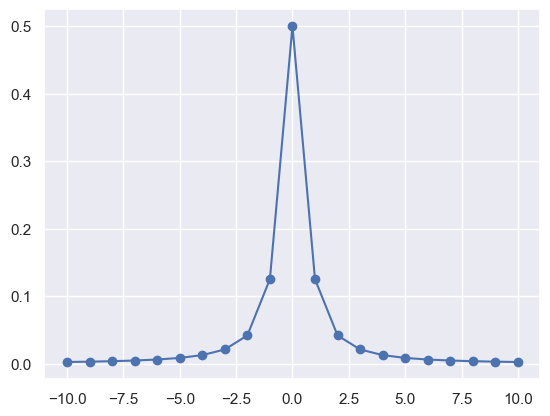

In [3]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

args = np.arange(-10, 11)
vals = 1/(4*np.abs(args)*(np.abs(args) + 1))
vals[args == 0] = 1/2

plt.plot(args, vals, marker='o')

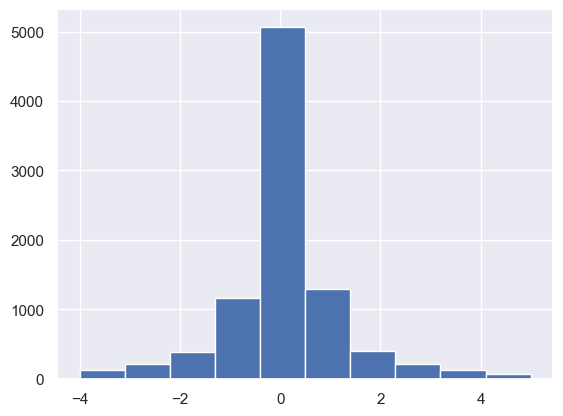

In [4]:
N = 10000
unis = np.random.uniform(0, 1, N)
sign = np.random.choice([-1, 0, 0, 1], N)
sampled = np.floor(1/unis)
sampled = sampled * sign

plt.hist(sampled, range=(-4, 5))
plt.show()

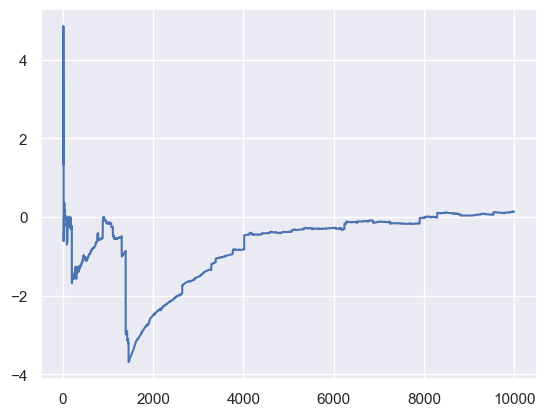

In [7]:
sampled_dashed = np.cumsum(sampled) / np.arange(1,N + 1)
plt.plot(sampled_dashed)
plt.show()

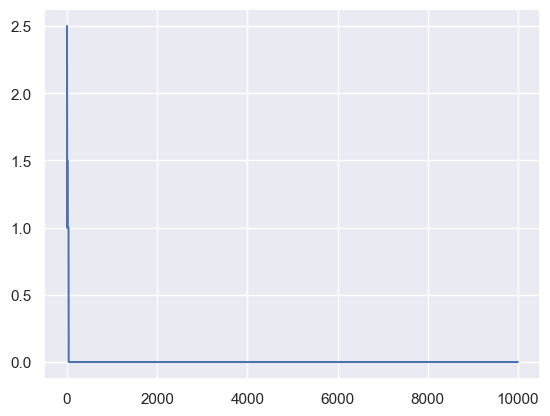

In [6]:
medians_sampled = np.array([np.median(sampled[ : (i + 1)]) for i in np.arange(1, N+1)])
plt.plot(medians_sampled)
plt.show()

W przyapdku median wartości początkowych widzimy, że ciąg jest zbieżny do zera. W przypadku średnich, wykres próbuje zbiegać do zera, czasem losuje się duża liczba, która psuje średnią. Dzieje się tak zapewne, ponieważ rozkład X nie ma wartości oczekiwanej dla $k$ dodatnich, ani $k$ ujemnych. Ma ją tylko dla sumy obu sum. Stąd dla tego rozkładu lepszą metodą na znalezienie wartości oczekiwanej jest patrzenie na medianę.